<a href="https://colab.research.google.com/github/XingxinHE/Python-for-Data-Analysis-Notes/blob/master/11_1_Date_and_Time_Data_Types_and_Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python原生的支持时间的模块， datetime, time,calendar

In [23]:
from datetime import datetime
import pandas as pd

In [2]:
#将此时此刻赋值为Now
now = datetime.now()

In [3]:
now

datetime.datetime(2020, 9, 17, 10, 26, 35, 333239)

In [4]:
#可以用method查看now的年份月份日期
now.year, now.month, now.day

(2020, 9, 17)

时间差用delta小三角来表示，同样可查看相关信息

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [6]:
delta

datetime.timedelta(926, 56700)

In [7]:
#将时间差转换为以天计算
delta.days

926

In [8]:
#时间差转为秒
delta.seconds

56700

## Converting Between String and Datetime

用str或者strftime将时间格式转化为string

In [9]:
#命名一个时间
stamp = datetime(2011, 1, 3)

In [10]:
#用str()转
str(stamp)

'2011-01-03 00:00:00'

In [11]:
#用strftime,  str format time
#意味着有更多的format的方法
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [12]:
stamp.strftime('%y-%m-%d')

'11-01-03'

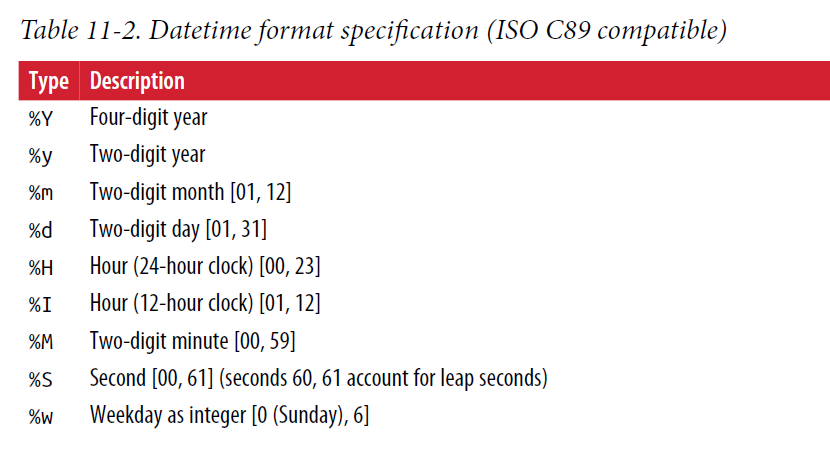

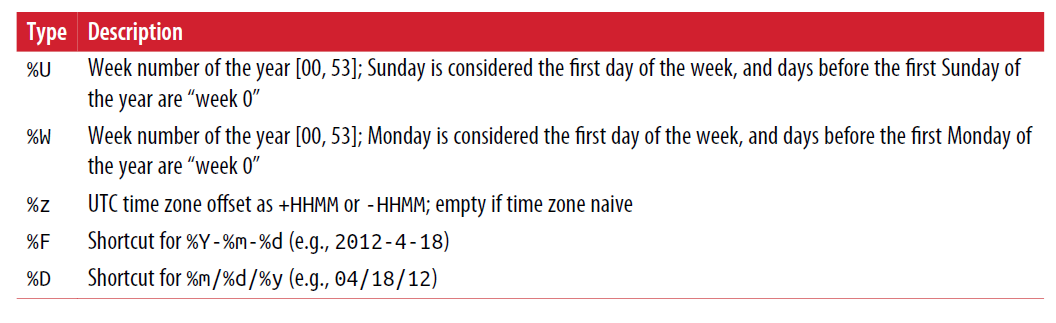

datetime.strptime是反向转换，把str转成time

In [13]:
value = '2011-01-03'

In [14]:
#指定转换谁和怎么转
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [16]:
#批量转换
datestrs = ['7/6/2011', '8/6/2011', '10/28/1994']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0),
 datetime.datetime(2011, 8, 6, 0, 0),
 datetime.datetime(1994, 10, 28, 0, 0)]

上面的方法都比较麻烦因为每次都要specify时间的格式，而有一些package很方便的是可以直接读取人类通常用到的时间格式

In [17]:
#pandas 内置的
from dateutil.parser import parse

以下是它处理不同时间格式的例子，只需要一个parse就可以了

In [18]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [19]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [21]:
parse('6/12/2011') #这个就没那么智能，也不怪它，因为你没法分辨第一个是日还是月

datetime.datetime(2011, 6, 12, 0, 0)

In [22]:
#这时候你可以specify
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

接下来说说pandas内置处理date stamp的方法

In [25]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

#这个
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

时间序列的NaN叫做NaT(not a time)

In [27]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [28]:
idx[2]

NaT

In [29]:
pd.isnull(idx)

array([False, False,  True])

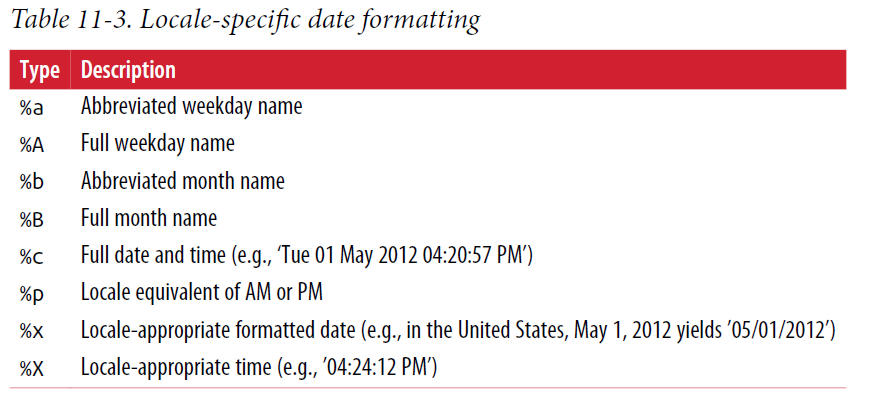